# Stochastic simulation of Boolean network with MaBoSS

This notebook show the basic features of the `maboss` Python module by reproducing part of the official MaBoSS tutorial at https://maboss.curie.fr/pub/TutorialMaBoSS_2_0.pdf

In [9]:
import maboss
import ginsim
import biolqm

### Model

The input model is a simple Boolean network created with GINsim. We download it from MaBoSS website and display its regulatory graph using the `ginsim` Python module:

In [3]:
lrg = ginsim.load("/tmp/colomotoiwirnwhi_nutrilip_model_july_2021.zginml")

In [4]:
ginsim.show(lrg)

### Building the `Simulation` object

A GINsim model can be converted to MaBoSS using the `to_maboss` function:

In [5]:
masim = ginsim.to_maboss(lrg)

In [6]:
lqm = ginsim.to_biolqm(lrg)

In [7]:
reporter_components = ["Propionate","Acetate", "Butyrate", "Methane"]

In [10]:
# Find fixed points, also called stable states
fps = biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components)
biolqm.states_to_dataframe(fps)

# Generation of a python dataframe containing all stable states, easy to filter.
fpsdf = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False))
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components))

# generation of a list of dictionaries for all stable states, easy to display.  
fpsdic = biolqm.fixpoints(lqm)

In [12]:
len(fpsdf)

22

In [11]:
fpsdf

,Glucose_6_P,Fructose_1_6_P,G3P,Pyruvate,Fba_enzyme,Acetyl_CoA,Phospho_glycerate,Arabino3_hexuose_6P,CO2,Methyl_H4MPT,Methyl_S_coM,Methylene_H4MPT,Formyl_MFR,Formate,Methanol,FwdB_enzyme,Acetate,Succinate,Oxaloacetate,Propionate,Ribulose1_5_BP,Fae_Hps_enzyme,Mer_enzyme,Mtr_enzyme,Methane,Mta_enzyme,Mcr_enzyme,Triglycerides,Glycerol,Unsaturated_FA,B_oxidation,Lactate,COS_Supp,Fructose_6P,Fbp_enzyme,mvh_enzyme,Cellulose_Starch_Sugars,H2,Butyrate,Formyl_H4MPT,CoB_M_SH,CoM_S_S_CoB
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,2,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,0,2,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,0,2,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,1
6,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,1,2,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0
7,1,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,1,1,1,2,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0
8,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,1,2,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0
9,1,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,1,1,1,2,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0


In [15]:
# Displaying the T cell commitment stable state on the regulatory graph (colour intensities represent qualitative levels)
ginsim.show(lrg,fpsdic[10])

MaBoSS allows to specify some nodes as "internal": the value of internal nodes is hidden in the output of simulations. 
By default, (if the network was built from scratch or if the `.cfg` file did not contain the information for a given node), all nodes have the attribute `is_internal` set to `False`. This can be changed within the script

You can change other MaBoSS parameters with the function update_parameters:

In [6]:
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

Once all the parameters are set, you can run the simulation. The following line will create two temporary files that contains everything MaBoSS needs to know to run properly. The result of the simulation are stored in a `Result` object.

To run the simulation, use the command below. This command can be quickly written by going to MaBoSS -> Simulation -> run.

In [ ]:
# COS_Supplementation + Cellulose_Starch_Sugars inputs

In [7]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])

In [8]:
maboss.set_nodes_istate(masim, ["CoM_S_S_CoB", "CO2", "H2"], [0,1])

In [9]:
maboss.set_nodes_istate(masim, ["COS_Supp", "Cellulose_Starch_Sugars"], [0,1])

### Performing simulations

The `run` method of the simulation object will call MaBoSS to perfom the requested simulations. A result object is then returned.

In [10]:
res = masim.run()

### Result visualizations

The result object provides access to the simulation output, and provides simple plotting functions.

The `plot_trajectory` method displays the mean probability of each state (composed of non-internal nodes) along time:

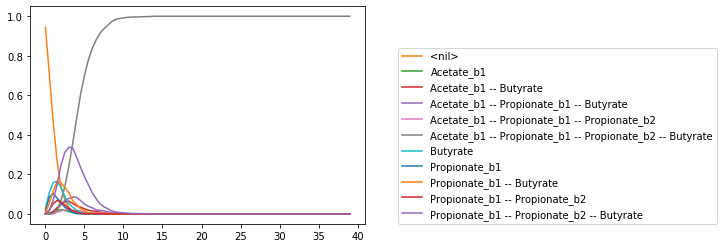

In [11]:
res.plot_trajectory()

The `plot_piechart` method displays the proportion of states in which each simulation ended, providing an approximation of the probability to reach the different attractors.

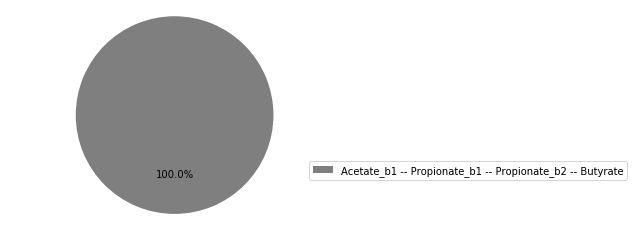

In [12]:
res.plot_piechart(autopct=True)

In [ ]:
# Other inputs simulations

In [ ]:
# COS_Supplementation input

In [13]:
masim = ginsim.to_maboss(lrg)
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

In [14]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])
maboss.set_nodes_istate(masim, [ "CO2", "H2", "CoM_S_S_CoB"], [0,1])
maboss.set_nodes_istate(masim, ["COS_Supp"], [0,1])

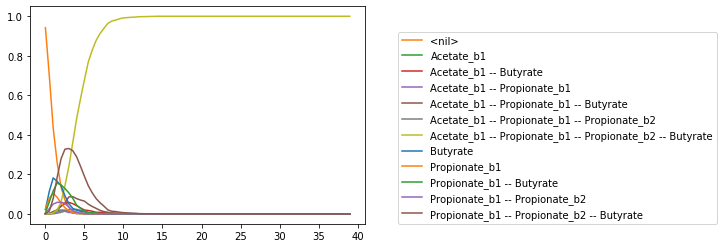

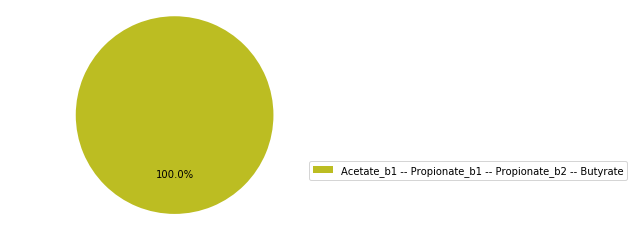

In [15]:
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

In [ ]:
# COS_Supplementation + Triglycerides inputs

In [16]:
masim = ginsim.to_maboss(lrg)
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

In [17]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])
maboss.set_nodes_istate(masim, ["CoM_S_S_CoB", "CO2", "H2"], [0,1])
maboss.set_nodes_istate(masim, ["COS_Supp", "Triglycerides"], [0,1])

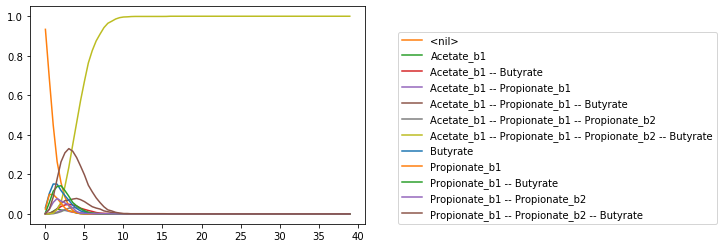

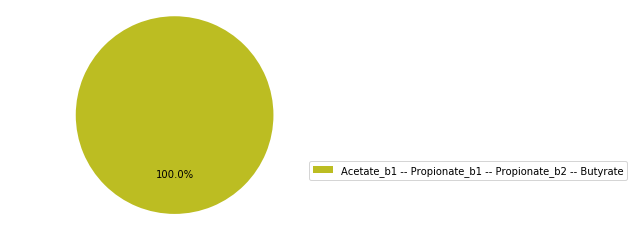

In [18]:
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

In [ ]:
#COS_Supplementation + Cellulose_Starch_Sugars + Triglycerides inputs

In [19]:
masim = ginsim.to_maboss(lrg)
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

In [20]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])
maboss.set_nodes_istate(masim, ["CoM_S_S_CoB", "CO2", "H2"], [0,1])
maboss.set_nodes_istate(masim, ["COS_Supp", "Triglycerides", "Cellulose_Starch_Sugars"], [0,1])

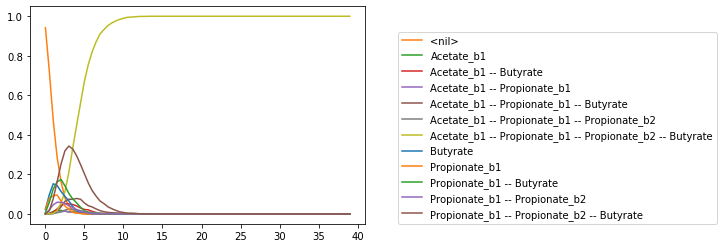

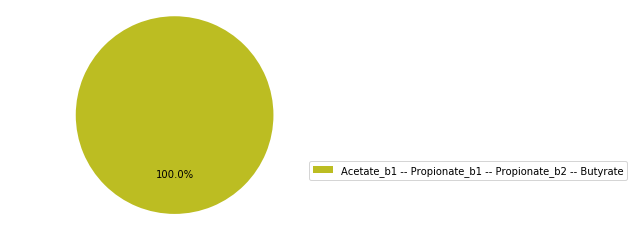

In [21]:
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

In [ ]:
# Cellulose_Starch_Sugars input

In [22]:
masim = ginsim.to_maboss(lrg)
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

In [23]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])
maboss.set_nodes_istate(masim, ["CoM_S_S_CoB", "CO2", "H2"], [0,1])
maboss.set_nodes_istate(masim, ["Cellulose_Starch_Sugars"], [0,1])

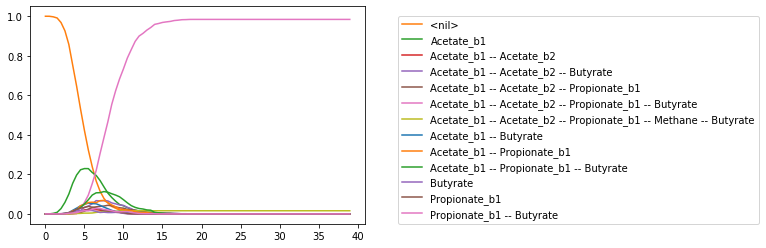

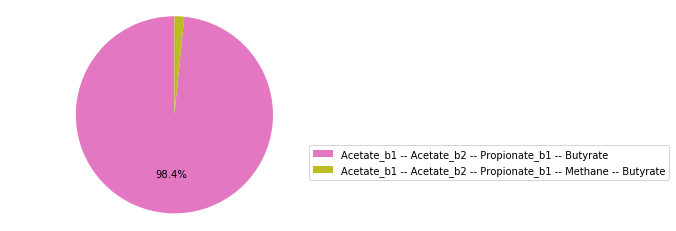

In [24]:
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

In [ ]:
#Triglycerides input

In [25]:
masim = ginsim.to_maboss(lrg)
masim.update_parameters(time_tick=0.5, max_time=40, sample_count=1000)

In [26]:
maboss.set_output(masim, [ "Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])
maboss.set_nodes_istate(masim, ["CoM_S_S_CoB", "CO2", "H2"], [0,1])
maboss.set_nodes_istate(masim, ["Triglycerides"], [0,1])

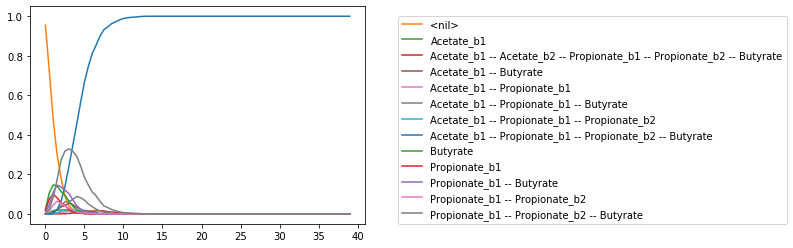

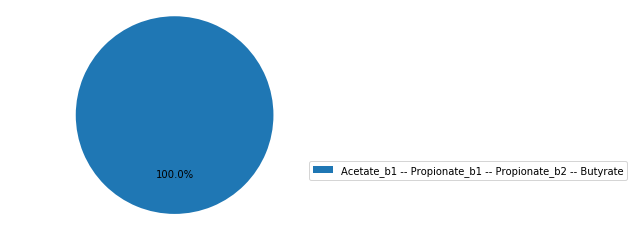

In [27]:
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

### Simulating mutations

The `maboss` Python module allow to modify a network model to perform the mutation of a node, that is forcing its value to be always 1 ("ON") or always 0 ("OFF").

In the following cell, we copy the initial model and configure a gain of function mutant for the node `Mdm2nuc`:

In [28]:
import ginsim
import biolqm
import pypint
import maboss

In [29]:
lqm = ginsim.to_biolqm(lrg)

In [30]:
lqm_mod = biolqm.perturbation(lqm, "Fba_enzyme%1")

In [31]:
lqm_mod =  biolqm.perturbation(lqm_mod, "Fae_Hps_enzyme%1")

In [32]:
lqm_mod =  biolqm.perturbation(lqm_mod, "Mer_enzyme%1")

In [33]:
mbs = biolqm.to_maboss(lqm_mod)

In [34]:
maboss.set_output(mbs, ["Methane", "Propionate_b1", "Propionate_b2", "Acetate_b1", "Acetate_b2", "Butyrate"])

In [35]:
ETP_ON_Nodes = ("CoM_S_S_CoB", "CO2", "H2", "COS_Supp")

In [36]:
maboss.set_nodes_istate(mbs, ETP_ON_Nodes, [0, 1])

The resulting model can then be simulated:

In [37]:
simres = mbs.run()

Simulation of ectopic expression of Fba_enzyme and Fae_Hps_enzyme and Mer_enzyme (level 1)
Entropy (TH) :
TH    0.0000
H     0.0192
Name: 15.5, dtype: float64


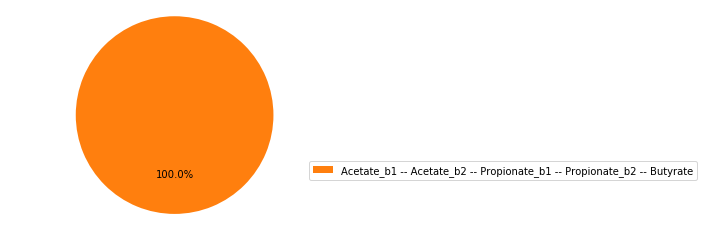

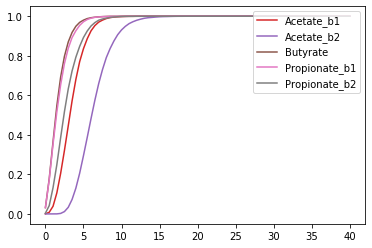

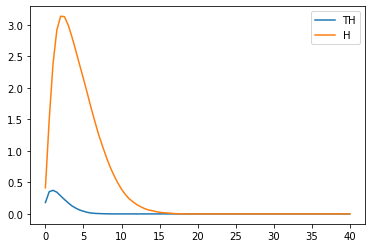

In [38]:
print("Simulation of ectopic expression of Fba_enzyme and Fae_Hps_enzyme and Mer_enzyme (level 1)")
print("Entropy (TH) :")
print(simres.get_entropy_trajectory().iloc[31]) 
simres.plot_piechart()
simres.plot_node_trajectory(until=40)
simres.plot_entropy_trajectory(until=40)

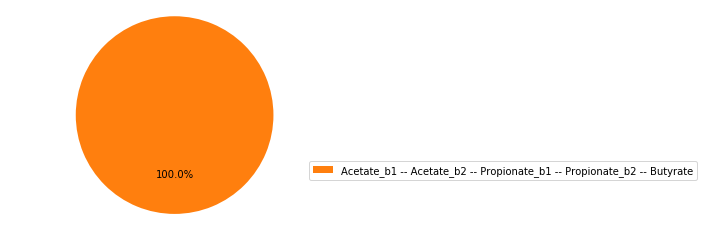

In [42]:
simres.plot_piechart()